In [1]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split, cross_val_predict

from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn import datasets

import pandas as pd

from mlxtend.plotting import plot_learning_curves, plot_decision_regions
from mlxtend.data import iris_data
from mlxtend.preprocessing import shuffle_arrays_unison

import matplotlib.pyplot as plt

random_state_num = 0
cv_num = 10
classes_num = 2 #there are two classes, non-negative (0) and negative (1) 

In [2]:
#read the csv of engineered features
#then split the columns into 
df_gensim_word2vec_features = pd.read_csv('..\data\gensim_word2vec_trained_with_engineered_features.csv')
X = df_gensim_word2vec_features.loc[:, df_gensim_word2vec_features.columns != 'binary_response_variable']
Y= df_gensim_word2vec_features.loc[:, df_gensim_word2vec_features.columns == 'binary_response_variable']

In [3]:
#Split into training set, and test set
# we do not need a validation set because we will be doing k-fold cross validation

#split into 0.7 training, and 0.3 testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = random_state_num)

#convert Y_train and Y_test into 1-d array so we don't get stupid warnings about needing a 1d array for Y, in cross_validate function
Y_train_1d = Y_train.values.ravel()
Y_test_1d = Y_test.values.ravel()

#convert Y_train and Y_test into numpy array
Y_train_np_array = Y_train.to_numpy()
Y_test_np_array = Y_test.to_numpy()

In [4]:
#try out your models here

#model = SVC(C = 1000000, gamma = 'auto', kernel = 'rbf', probability=True)
#model = DecisionTreeClassifier()
#model = LogisticRegression(C=100, random_state = random_state_num, max_iter = 1000)

#model = GradientBoostingClassifier(random_state = random_state_num)
model = AdaBoostClassifier(random_state = random_state_num)

In [5]:
#custom f2 score
#this places higher value on recall than precision 
#i.e. a false negative has higher cost than a false positive
#(this makes sense: a negative tweet we don't catch classify us more than a positive tweet we don't classify)
f2_scorer = make_scorer(fbeta_score, beta=2)

#for the other scorers, we need to create scorers from scratch since we want to use a dictionary for f2_scorer under 'scoring'
balanced_accuracy_scorer = make_scorer(balanced_accuracy_score)
precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)
f1_scorer = make_scorer(f1_score)
roc_auc_scorer = make_scorer(roc_auc_score)

In [6]:
metrics_dict = cross_validate(
        model, 
        X_train, 
        Y_train_1d, 
        #scoring = ['balanced_accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
        scoring = {
            'balanced_accuracy': balanced_accuracy_scorer, 
            'precision': precision_scorer, 
            'recall': recall_scorer, 
            'f1': f1_scorer,
            'f2': f2_scorer,
            'roc_auc': roc_auc_scorer
        },
        cv = cv_num
    )

In [7]:
for key in metrics_dict.keys():
    print('metric key: ' + key)
    
    array_of_metric_scores = metrics_dict[key]
    score_sum = 0
    for metric_score in array_of_metric_scores:
        score_sum = score_sum + metric_score
    print('average metric score: ' + str(score_sum/cv_num))

metric key: fit_time
average metric score: 4.398985409736634
metric key: score_time
average metric score: 0.022143244743347168
metric key: test_balanced_accuracy
average metric score: 0.7703957611083174
metric key: test_precision
average metric score: 0.8188896920522903
metric key: test_recall
average metric score: 0.8683356133150933
metric key: test_f1
average metric score: 0.8427732258985549
metric key: test_f2
average metric score: 0.8578973469351112
metric key: test_roc_auc
average metric score: 0.7703957611083176


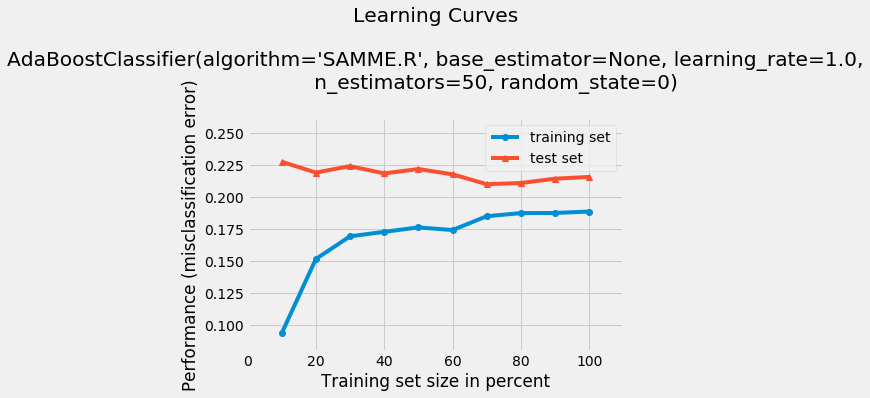

In [8]:
plot_learning_curves(X_train, Y_train_1d, X_test, Y_test_1d, model)
plt.show()